## **Project Purpose**
> The purpose of this project is to identify which patients are more likely to be classified as those who need to urgently get into the ICU.

### **Data Dictionary:**
   1. **id:** The identification number of the patient.
   2. **sex:** Identify gender of the patient, 1 as female and 2 as male.
   3. **patient_type:** Type of patient, 1 for not hospitalized and 2 for hosptalized.
   4. **entry_date:** The date that the patient went to the hospital.
   5. **date_symptoms:** The date that the patient started to show symptoms.
   6. **date_died:** The date that the patient died, “9999-99-99” stands for recovered.
   7. **intubed:** Intubation is a procedure that’s used when you can’t breathe on your own.“1” denotes that the patient used ventilator and “2” denotes that the patient did not, “97” “98” “99” means not specified.
   8. **pneumonia:** Indicates whether the patient already have air sacs inflammation or not “1” for yes, “2” for no, “97” “98” “99” means not specified.
   9. **age:** Specifies the age of the patient.
   10. **pregnancy:** Indicates whether the patient is pregnant or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   11. **diabetes:** Indicates whether the patient has diabetes or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   12. **copd:** Indicates whether the patient has Chronic obstructive pulmonary disease (COPD) or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   13. **asthma:** Indiactes whether the patient has asthma or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   14. **inmsupr:** Indicates whether the patient is immunosuppressed or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   15. **hypertension:** Indicates whether the patient has hypertension or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   16. **other_disease:** Indicates whether the patient has other disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   17. **cardiovascular:** Indicates whether if the patient has heart or blood vessels realted disease, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   18. **obesity:** Indicates whether the patient is obese or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   19. **renal_chronic:** Indicates whether the patient has chronic renal disease or not, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   20. **tobacco:** Indicates whether if the patient is a tobacco user, “1” for yes, “2” for no, “97” “98” “99” means not specified.
   21. **contact_other_covid:** Indicates whether if the patient has contacted another covid19 patient.
   22. **icu:** Indicates whether the if the patient had been admitted to an Intensive Care Unit (ICU), “1” for yes, “2” for no, “97” “98” “99” means not specified.
   23. **covid_res:** 1 indicates person is covid +ve, 2 indicates person is covide -ve, 3 indicates result is in awaiting process.

### **Importing Models and Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### **Importing Dataset**

In [2]:
df = pd.read_csv('../input/covid19-patient-precondition-dataset/covid.csv', parse_dates=[3, 4])
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,2020-04-05,2020-02-05,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,2020-03-19,2020-03-17,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,2020-06-04,2020-01-04,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,2020-04-17,2020-10-04,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,2020-04-13,2020-04-13,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [3]:
df.shape

(566602, 23)

Check if there are any null values present in the dataset

In [4]:
df.isnull().sum().any()

False

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   566602 non-null  object        
 1   sex                  566602 non-null  int64         
 2   patient_type         566602 non-null  int64         
 3   entry_date           566602 non-null  datetime64[ns]
 4   date_symptoms        566602 non-null  datetime64[ns]
 5   date_died            566602 non-null  object        
 6   intubed              566602 non-null  int64         
 7   pneumonia            566602 non-null  int64         
 8   age                  566602 non-null  int64         
 9   pregnancy            566602 non-null  int64         
 10  diabetes             566602 non-null  int64         
 11  copd                 566602 non-null  int64         
 12  asthma               566602 non-null  int64         
 13  inmsupr       

In [6]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000,566602.000000
mean,1.506726,1.215165,76.562952,1.846262,42.622483,50.400692,2.210633,2.280221,2.265029,2.319628,2.145774,2.410030,2.286157,2.138905,2.283765,2.238360,31.573034,1.728651,76.562864
std,0.499955,0.410937,39.058676,0.560939,16.659973,47.501579,5.683523,5.327832,5.334658,5.667381,5.459866,6.489959,5.438405,5.395578,5.393232,5.571901,45.082123,0.658710,39.059060
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000


<AxesSubplot:>

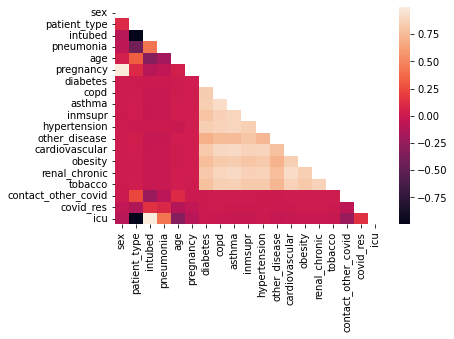

In [7]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask)

Creating a new feature from the difference of the date the patient started showing symptoms and the date that same patient when to a healthcare center.

In [8]:
df["symp_duration"] = (df.entry_date - df.date_symptoms).dt.days

In [9]:
df.symp_duration.unique()

array([  60,    2,  152, -170,    0,    9,    3,    4,    5,   91,   10,
        121,  304,    1,  -21,  -84,    6, -137,    7, -111,    8,   41,
        153, -235,  -24,   92,  -82,   31,  -25,  -51, -202, -172, -248,
       -112, -174, -144,  -49,  -20,   61,  182,   30, -205, -233,  122,
        184,  -77,   14,  -19, -113,   42, -230,  -52,  214, -204,  -26,
        -80,  -83,  -53,  101,  305,  -86,   43, -106,  245,  -75,  104,
         62, -171, -201,  -79, -169,  -27, -101,  190,  243,  -55, -168,
       -109,   12, -115,  244,   70,  213,  -22,   97,   40,  -81, -110,
         36, -176,  123,   90,  -76,  100,   73, -193, -138,   67,  -78,
       -197, -232, -140,  -23, -231,   69,  129, -105, -143, -141,   37,
       -173, -175,   11, -200,  160,  -42,   66,   68,   29,  -17,   98,
        -85, -114,  132,  -18, -146,   71,  -12,  -47,  102, -142,   18,
        -56, -108, -226,  183,  275, -234,   13, -228, -116, -206,   99,
       -199, -139,  -15,  -48, -227,   39,  151,  -

* The negative values are for those patients who started showing symptoms after being admitted to the health center.
* The positive values are for those patients who started showing symptoms before being admitted.
* Zero values are for those patients that started showing symptoms the same day they were admitted.

Now let's normalize it!

In [10]:
min(df.symp_duration)

-334

In [11]:
df.symp_duration.apply(lambda x : x + 334)

0         394
1         336
2         486
3         164
4         334
         ... 
566597    403
566598    364
566599    464
566600    336
566601    334
Name: symp_duration, Length: 566602, dtype: int64

In [12]:
max_val = max(df.symp_duration)
min_val = min(df.symp_duration)
df["symp_duration"] = df["symp_duration"].apply(lambda x: round((max_val - x)/(max_val - min_val), 2))

In [13]:
df.symp_duration.unique()

array([0.41, 0.5 , 0.27, 0.75, 0.49, 0.36, 0.32, 0.05, 0.53, 0.63, 0.71,
       0.67, 0.44, 0.85, 0.54, 0.62, 0.45, 0.58, 0.8 , 0.76, 0.87, 0.72,
       0.57, 0.23, 0.46, 0.81, 0.48, 0.84, 0.18, 0.35, 0.04, 0.66, 0.13,
       0.61, 0.65, 0.22, 0.14, 0.4 , 0.37, 0.39, 0.79, 0.31, 0.26, 0.56,
       0.3 , 0.52, 0.47, 0.09, 0.28, 0.7 , 0.77, 0.  , 0.73, 0.16, 0.21,
       0.17, 0.43, 0.34, 0.38, 0.83, 0.25, 0.74, 0.89, 0.88, 0.68, 0.33,
       0.9 , 0.42, 0.6 , 0.69, 0.19, 0.82, 0.91, 0.2 , 0.78, 0.15, 0.55,
       0.51, 0.96, 0.24, 0.95, 0.64, 0.29, 0.59, 0.98, 0.94, 0.93, 0.86,
       0.08, 0.12, 1.  , 0.11, 0.97])

Now that we have extracted this useful information we no longer have a use for the `entry_date` and `date_symptoms` features.

In [14]:
df.drop(["date_symptoms", "entry_date"], axis=1, inplace=True)

Now we add a feature indicating whether patients died or not by using the `date_died` feature. The `date_died` feature will then be dropped.

In [15]:
df["dead"] = df["date_died"].apply(lambda x: 0 if x == '9999-99-99' else 1)
df.drop(["date_died"], axis=1, inplace=True)

Unfortunately for the efforts, the `dead` feature is not useful for our purposes.

In [16]:
df.drop(["dead"], axis=1, inplace=True)

In [17]:
df.icu.value_counts()

97    444689
2     111676
1      10112
99       125
Name: icu, dtype: int64

The `icu` feature needs editing. It should be binarized and values indicating that the status is undecided will be removed.

In [18]:
df.loc[df["icu"]==2, "icu"] = 0
df = df[df["icu"]<2]
df.icu.unique()

array([0, 1])

In [19]:
df.shape

(121788, 21)

The same procedure should apply for those features with undecided values.

In [20]:
df.loc[df['patient_type']==2,'patient_type']=1
df.loc[df['patient_type']==1,'patient_type']=0
df.loc[df['sex']==2,'sex']=0
df.loc[df['inmsupr']==2,'inmsupr']=0
df.loc[df['pneumonia']==2,'pneumonia']=0
df.loc[df['diabetes']==2,'diabetes']=0
df.loc[df['asthma']==2,'asthma']=0
df.loc[df['copd']==2,'copd']=0
df.loc[df['hypertension']==2,'hypertension']=0
df.loc[df['cardiovascular']==2,'cardiovascular']=0
df.loc[df['renal_chronic']==2,'renal_chronic']=0
df.loc[df['obesity']==2,'obesity']=0
df.loc[df['tobacco']==2,'tobacco']=0
df.loc[df['intubed']==2,'intubed']=0
df.loc[df['icu']==2,'icu']=0
df.loc[df['covid_res']==2,'covid_res']=0

Now we have to learn which features are useful for our prediction. Let's analyze the count values of the following:

In [21]:
feature_count = ["patient_type","intubed","hypertension","other_disease","cardiovascular","obesity","renal_chronic","tobacco","contact_other_covid","covid_res","inmsupr","asthma","copd","diabetes","pregnancy","pneumonia"]

In [22]:
for feature in feature_count:
    print (f"{feature}: {df[feature].value_counts()}\n")

patient_type: 0    121788
Name: patient_type, dtype: int64

intubed: 0    111823
1      9965
Name: intubed, dtype: int64

hypertension: 0     80877
1     40302
98      609
Name: hypertension, dtype: int64

other_disease: 2     113466
1       7282
98      1040
Name: other_disease, dtype: int64

cardiovascular: 0     114842
1       6300
98       646
Name: cardiovascular, dtype: int64

obesity: 0     96060
1     25094
98      634
Name: obesity, dtype: int64

renal_chronic: 0     113945
1       7234
98       609
Name: renal_chronic, dtype: int64

tobacco: 0     110413
1      10736
98       639
Name: tobacco, dtype: int64

contact_other_covid: 99    62090
2     42452
1     17246
Name: contact_other_covid, dtype: int64

covid_res: 1    68210
0    39213
3    14365
Name: covid_res, dtype: int64

inmsupr: 0     116388
1       4722
98       678
Name: inmsupr, dtype: int64

asthma: 0     118062
1       3141
98       585
Name: asthma, dtype: int64

copd: 0     115713
1       5491
98       584
Name

<AxesSubplot:>

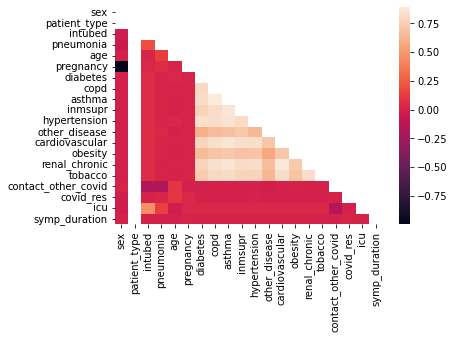

In [23]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask)

In [24]:
df.drop(["patient_type","other_disease","contact_other_covid","pregnancy","hypertension"], axis=1, inplace=True)

In [25]:
df.shape

(121788, 16)

In [26]:
df = df[df["intubed"]<2]
df = df[df["cardiovascular"]<2]
df = df[df["obesity"]<2]
df = df[df["renal_chronic"]<2]
df = df[df["tobacco"]<2]
df = df[df["covid_res"]<2]
df = df[df["inmsupr"]<2]
df = df[df["asthma"]<2]
df = df[df["copd"]<2]
df = df[df["diabetes"]<2]
df = df[df["pneumonia"]<2]

In [27]:
df.reset_index(drop=True, inplace=True)
df.shape

(106298, 16)

In [28]:
df.head()

,id,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,cardiovascular,obesity,renal_chronic,tobacco,covid_res,icu,symp_duration
0,167386,1,0,0,54,0,0,0,0,0,1,0,0,1,0,0.27
1,0b5948,0,0,1,30,0,0,0,0,0,0,0,0,1,0,0.75
2,0d01b5,1,0,0,60,1,0,0,0,1,0,0,0,1,0,0.50
3,1beec8,0,0,1,47,1,0,0,0,0,0,0,0,1,1,0.50
4,1.75E+56,0,0,0,63,0,0,0,0,0,0,0,0,1,0,0.49


### **Splitting Data to Train and Test**

In [29]:
X = df.drop(["id", "icu"],axis=1)
Y = df["icu"]

In [30]:
X.head()

,sex,intubed,pneumonia,age,diabetes,copd,asthma,inmsupr,cardiovascular,obesity,renal_chronic,tobacco,covid_res,symp_duration
0,1,0,0,54,0,0,0,0,0,1,0,0,1,0.27
1,0,0,1,30,0,0,0,0,0,0,0,0,1,0.75
2,1,0,0,60,1,0,0,0,1,0,0,0,1,0.50
3,0,0,1,47,1,0,0,0,0,0,0,0,1,0.50
4,0,0,0,63,0,0,0,0,0,0,0,0,1,0.49


In [31]:
Y.value_counts()

0    97489
1     8809
Name: icu, dtype: int64

Clearly the data is imbalanced! We will takes steps in balancing it using **Synthetic Minority Oversampling Technique(SMOTE)**

In [32]:
smote = SMOTE(random_state=42)
x_bal, y_bal = smote.fit_resample(X, Y)

In [33]:
y_bal.value_counts()

0    97489
1    97489
Name: icu, dtype: int64

Now that the data is balanced, let's move on to train, test split and model fitting and evaluation.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state=0)

**Standardizing the data**

In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### **Model Fitting and Evaluation**

In [36]:
def Model(model):
    
    model.fit(x_train, y_train)
    results = model.predict(x_test)
    
    print("Train Accuracy = {}".format(accuracy_score(y_train, model.predict(x_train))))
    print("Test Accuracy = {}".format(accuracy_score(y_test, results)))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, results))
    print("Classification Report")
    print(classification_report(y_test, results))

In [37]:
Model(LogisticRegression())

Train Accuracy = 0.7222564142016387
Test Accuracy = 0.7230485177966971
Confusion Matrix
[[17167  2203]
 [ 8597 11029]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.89      0.76     19370
           1       0.83      0.56      0.67     19626

    accuracy                           0.72     38996
   macro avg       0.75      0.72      0.72     38996
weighted avg       0.75      0.72      0.72     38996



In [38]:
Model(KNeighborsClassifier(n_neighbors=5,weights='distance',p=1,metric='minkowski'))

Train Accuracy = 0.9259209395955944
Test Accuracy = 0.8383167504359421
Confusion Matrix
[[16280  3090]
 [ 3215 16411]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19370
           1       0.84      0.84      0.84     19626

    accuracy                           0.84     38996
   macro avg       0.84      0.84      0.84     38996
weighted avg       0.84      0.84      0.84     38996



In [39]:
Model(XGBClassifier())

Train Accuracy = 0.8842815196625252
Test Accuracy = 0.8814493794235306
Confusion Matrix
[[18420   950]
 [ 3673 15953]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     19370
           1       0.94      0.81      0.87     19626

    accuracy                           0.88     38996
   macro avg       0.89      0.88      0.88     38996
weighted avg       0.89      0.88      0.88     38996



In [40]:
Model(GradientBoostingClassifier(max_features='auto', loss='deviance',learning_rate=0.3, 
                                   max_depth=8,min_samples_leaf=3,min_samples_split=0.1, n_estimators=400, subsample=0.4))

Train Accuracy = 0.8813773384108423
Test Accuracy = 0.8812955174889733
Confusion Matrix
[[18357  1013]
 [ 3616 16010]]
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     19370
           1       0.94      0.82      0.87     19626

    accuracy                           0.88     38996
   macro avg       0.89      0.88      0.88     38996
weighted avg       0.89      0.88      0.88     38996



In [41]:
Model(RandomForestClassifier())

Train Accuracy = 0.9331461322460284
Test Accuracy = 0.8767565904195302
Confusion Matrix
[[17125  2245]
 [ 2561 17065]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     19370
           1       0.88      0.87      0.88     19626

    accuracy                           0.88     38996
   macro avg       0.88      0.88      0.88     38996
weighted avg       0.88      0.88      0.88     38996



## **The XGBClassifier model perfomed best with a training accuracy of 88.42 %, and a testing accuracy of 88.14 %**